In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data = []
directory = r'C:\Users\Hans\omni.replicator_out\replicator_pallets_random_new\bbox2D_txt'
#directory = r'D:\code\DATA\REPLICATOR_PALLETS_YOLO\labels\train'
IMG_SIZE = 1280

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()
            for line in lines:
                values = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, values)
                width *= IMG_SIZE
                height *= IMG_SIZE
                area = width * height  # calculate area
                data.append([class_id, x_center, y_center, width, height, area])

columns = ['class_id', 'x_center', 'y_center', 'width', 'height', 'area']
df = pd.DataFrame(data, columns=columns)

filtered_df = df[df['class_id'] == 6]

# The rest of the code is the same as above

print(filtered_df.describe(percentiles=[.05, .25, .5, .75, .90, .95]))

width_05, width_95 = filtered_df['width'].quantile([0.05, 0.95])
height_05, height_95 = filtered_df['height'].quantile([0.05, 0.95])

# Filtering the data
filtered_df = filtered_df[(filtered_df['width'] >= width_05) & (filtered_df['width'] <= width_95) & 
                 (filtered_df['height'] >= height_05) & (filtered_df['height'] <= height_95)]

print(filtered_df.describe(percentiles=[.05, .25, .5, .75, .90, .95]))

       class_id      x_center      y_center         width        height  \
count   92918.0  92918.000000  92918.000000  92918.000000  92918.000000   
mean        6.0      0.522621      0.447273    212.379636     95.234207   
std         0.0      0.310603      0.164557    153.741114     80.507752   
min         6.0      0.000781      0.037891      1.000000      4.000000   
5%          6.0      0.042969      0.200391     39.000000     31.000000   
25%         6.0      0.244141      0.320312    132.000000     46.000000   
50%         6.0      0.531250      0.419531    188.000000     69.000000   
75%         6.0      0.813281      0.566797    254.000000    110.000000   
90%         6.0      0.939844      0.628906    346.000000    187.000000   
95%         6.0      0.968750      0.719141    452.000000    256.000000   
max         6.0      0.998828      0.997266   1279.000000    506.000000   

                area  
count   92918.000000  
mean    29422.967197  
std     60493.524818  
min    

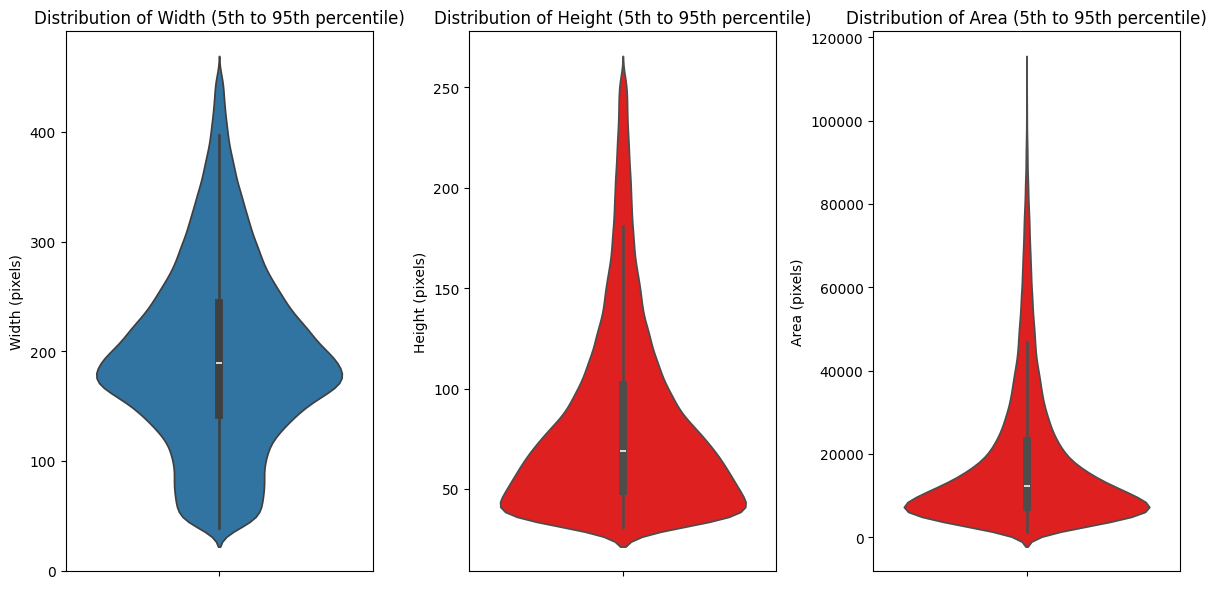

In [5]:
# Now plot the filtered data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.violinplot(y=filtered_df['width'])
plt.ylabel('Width (pixels)')
plt.title('Distribution of Width (5th to 95th percentile)')

plt.subplot(1, 3, 2)
sns.violinplot(y=filtered_df['height'], color='r')
plt.ylabel('Height (pixels)')
plt.title('Distribution of Height (5th to 95th percentile)')
2
plt.subplot(1, 3, 3)
sns.violinplot(y=filtered_df['area'], color='r')
plt.ylabel('Area (pixels)')
plt.title('Distribution of Area (5th to 95th percentile)')

plt.tight_layout()
plt.show()

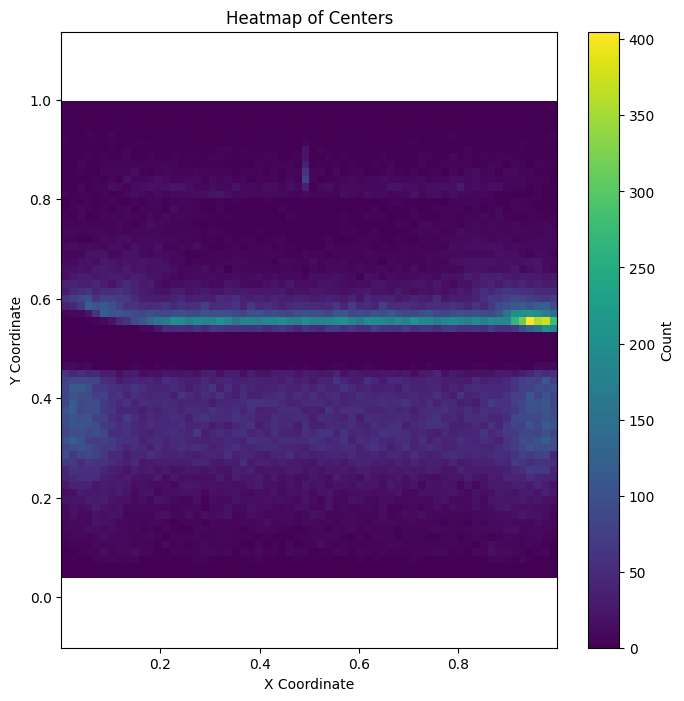

In [6]:
# Assuming df is your DataFrame and you have already filtered it as necessary
plt.figure(figsize=(8, 8))
plt.hist2d(df['x_center'], df['y_center'], bins=(64, 64))
plt.colorbar(label='Count')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Centers')
plt.axis('equal')  # This ensures that the scale of x and y is the same, so circles don't become ellipses
plt.show()